# Trace Display in Thunder/Lightning

      Data Gathered: 01.29.15           
      Analyzed: 12.19.15
      Gathered By: WALIII & DPL
      
Analysis of Calciuim imaging data from singing birds with the FreedomScope, from a bout containing several songs. Data was sampled at 30Hz

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image

In [2]:
from lightning import Lightning
lgn = Lightning(local=True)

Lightning initialized


In [96]:
thunder.__version__


'0.6.0.dev'

In [3]:
%matplotlib inline

In [4]:
import os.path as pth
imagepath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), '/Users/ARGO/Dropbox/Jupyter/Song_lowSNR.tif')

In [5]:
data = tsc.loadImages(imagepath, inputFormat='tif-stack', nplanes = 1)

In [6]:
data.cache()
data.count();

In [7]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

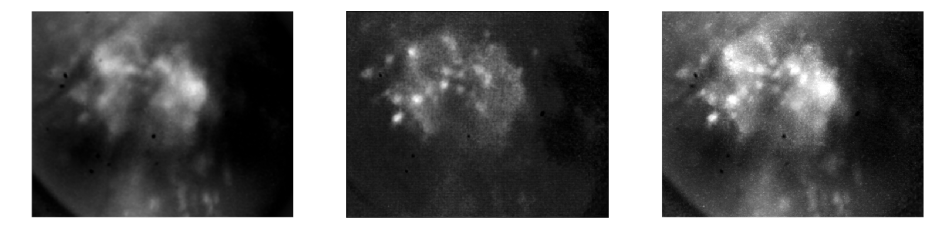

In [8]:
# look at the mean, std and Max projection images, and we will overlay these with our ROI masks

im = data.mean()

ax1 = plt.subplot(131)
im = data.mean()
image(im[:], ax=plt.gca())
plt.subplot(132)
img = data.stdev()
image(img[:], ax=plt.gca())
plt.subplot(133)
img = data.max()
image(img[:], ax=plt.gca())

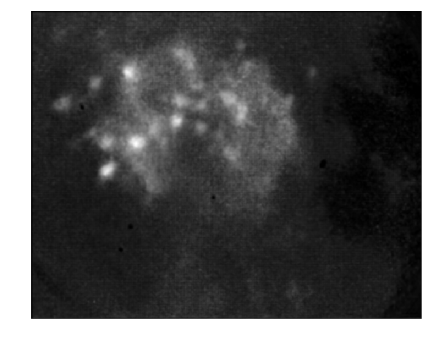

In [32]:
ref = data.stdev()
image(ref)

In [82]:
def run(data):
    
    from thunder import SourceExtraction
    method = SourceExtraction('localmax', maxSources=300, minDistance=11, radius=15)
    result = method.fit(data)
    
    return result

In [83]:
out = run(data)

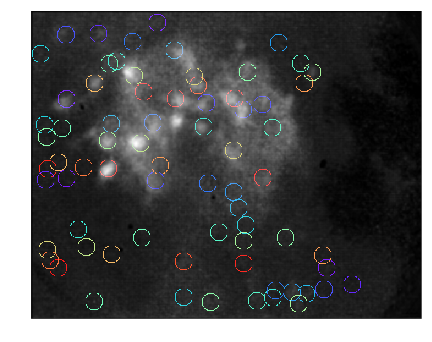

In [84]:
image(out.masks((560,710), base=ref, outline=True, color='random'))

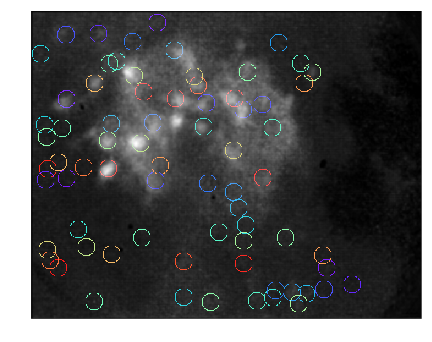

In [92]:
image(out.masks((560,710), base=ref, outline=True, color='random'))

In [16]:
output = data.meanByRegions(out.coordinates).toSeries()
plotData = output.toTimeSeries();



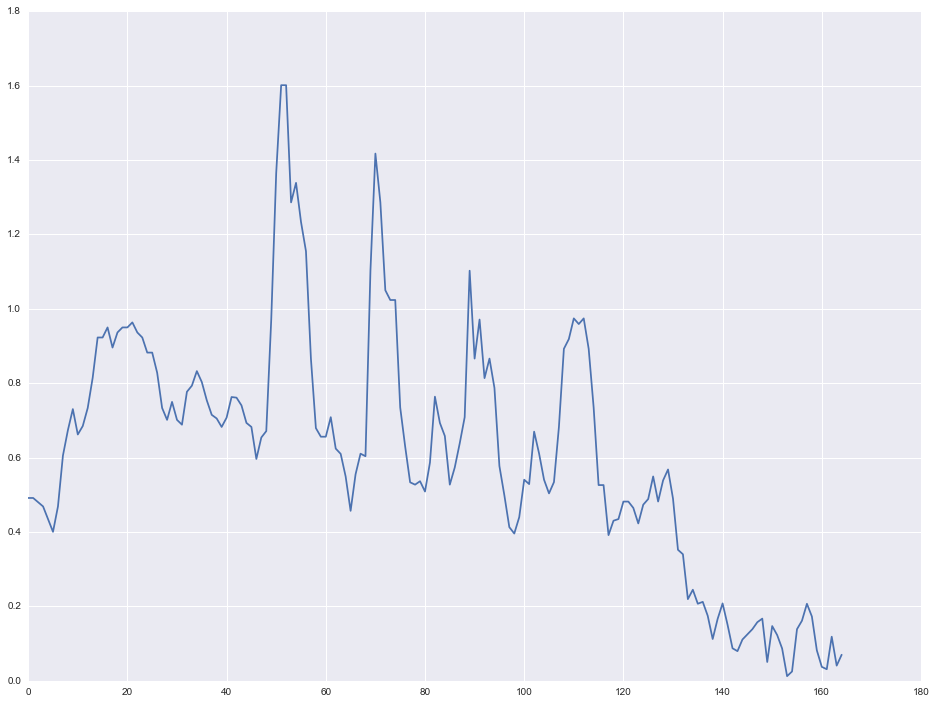

In [85]:
output.index.shape
plt.plot(plotData.normalize().max());



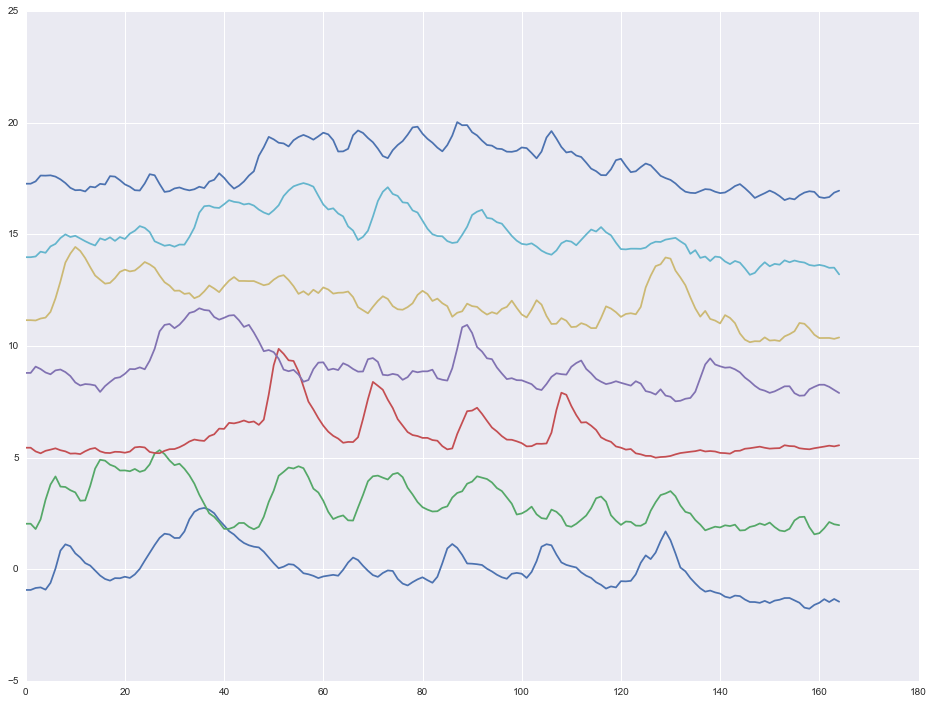

In [19]:
import numpy as np
from scipy import stats
sns.set_style('darkgrid')
lines = 7

examples = output.toTimeSeries().center(axis=1).subset(nsamples=lines, thresh=18)
mean = examples.mean(axis=1)

examples2 = examples - mean[:, np.newaxis]

examples4 = stats.zscore(examples2, axis=1)
examples5 = (examples4.T + np.arange(0,lines)*3).T
plt.plot(examples5.T); #  [0:20,:]);



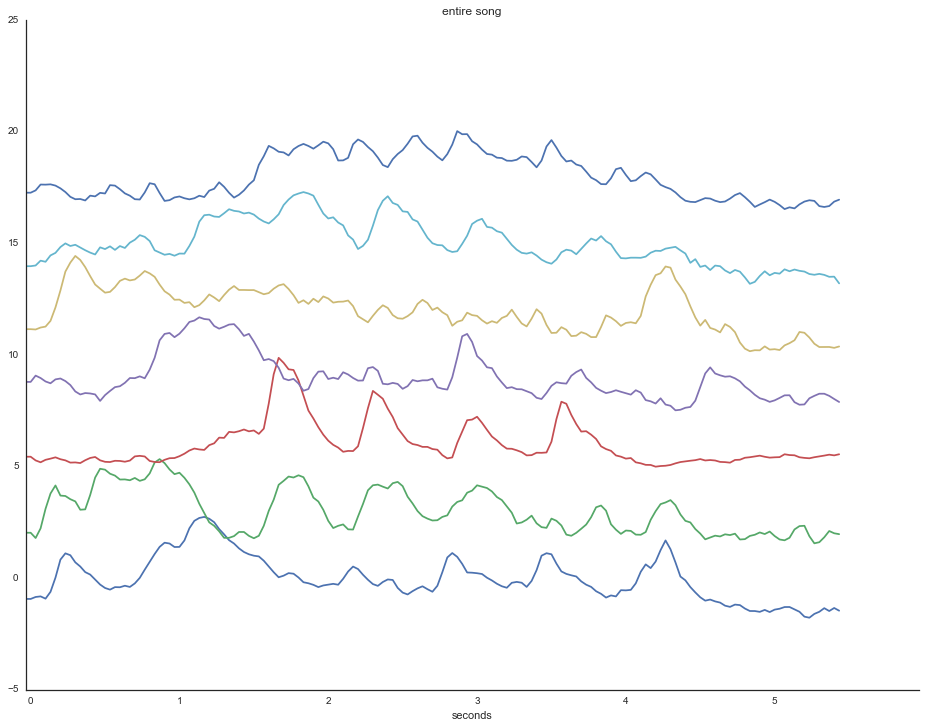

In [20]:
# Lets make a prettier picture of the data- despine and take out the darkgrid, and 
# add an appropriate time axis:

import seaborn as sns
sns.set_style("white")
plt.title('entire song')

plt.plot(examples5.T); #  [0:20,:]);
ticks = np.arange(1,examples5.shape[1],30) # Make tics every 30 steps, or once per second
labels = range(ticks.size)
plt.xticks(ticks, labels)
plt.xlabel('seconds')
sns.despine()

OK, now lets try using Lighting-vis:

Lightning initialized



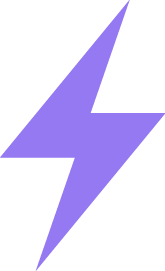

Running local mode, some functionality limited.



In [37]:
from lightning import Lightning
lgn = Lightning(local=True)

lgn = Lightning(ipython=True, local=True)

In [39]:
#OK, now lets do some manual ROI selection:

from lightning import Lightning

lgn = Lightning()

viz = lgn.imagepoly(ref)
viz

Lightning initialized
Connected to server at http://localhost:3000


In [50]:
p = viz.polygons()


output = data.meanByRegions(p).toSeries()
plotData = output.toTimeSeries();



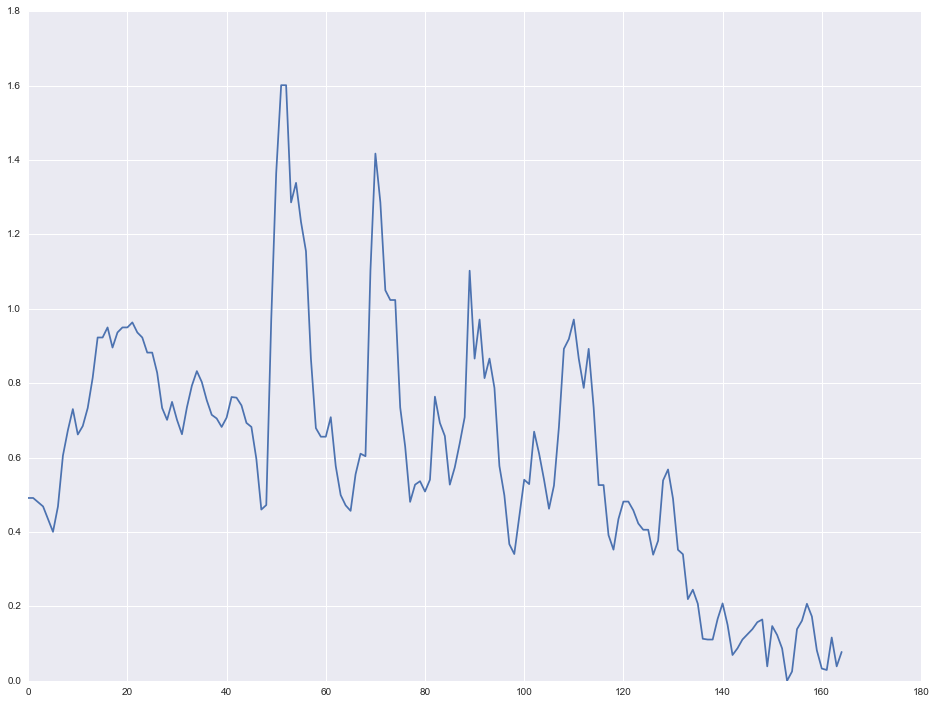

In [51]:
output.index.shape
plt.plot(plotData.normalize().max());

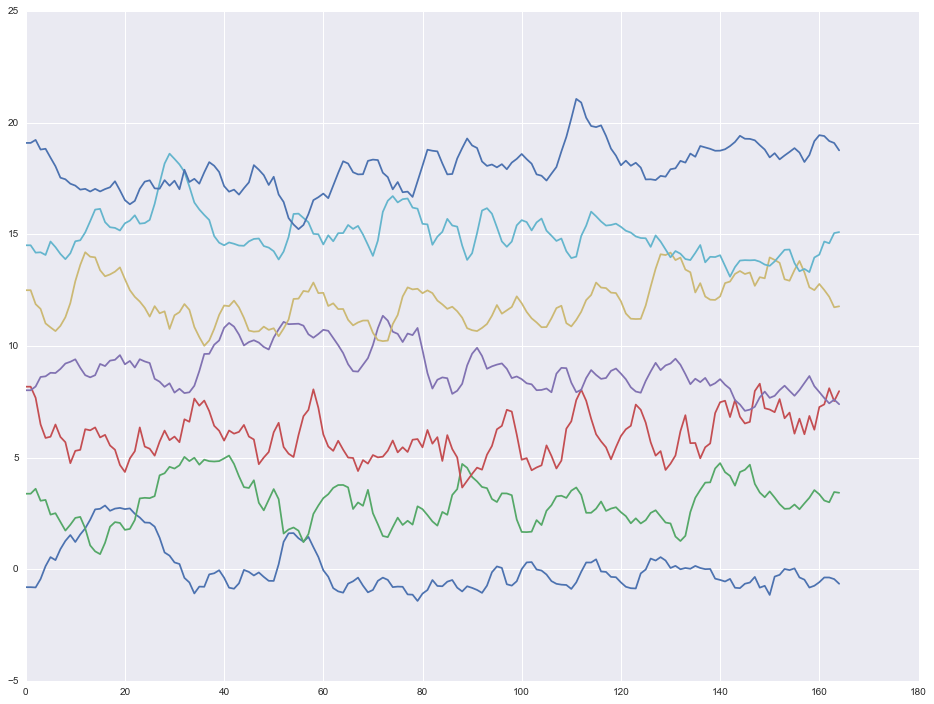

In [52]:
import numpy as np
from scipy import stats
sns.set_style('darkgrid')
lines = 7

examples = output.toTimeSeries().center(axis=1).subset(nsamples=lines, thresh=1)
mean = examples.mean(axis=1)

examples2 = examples - mean[:, np.newaxis]

examples4 = stats.zscore(examples2, axis=1)
examples5 = (examples4.T + np.arange(0,lines)*3).T
plt.plot(examples5.T); #  [0:20,:]);

In [54]:
img = data.max()

In [56]:
#OK, now lets do some manual ROI selection:

from lightning import Lightning

lgn = Lightning()

viz2 = lgn.imagepoly(img, polygons=p)
viz2

Lightning initialized
Connected to server at http://localhost:3000


In [58]:
p = viz2.polygons()


output = data.meanByRegions(p).toSeries()
plotData = output.toTimeSeries();

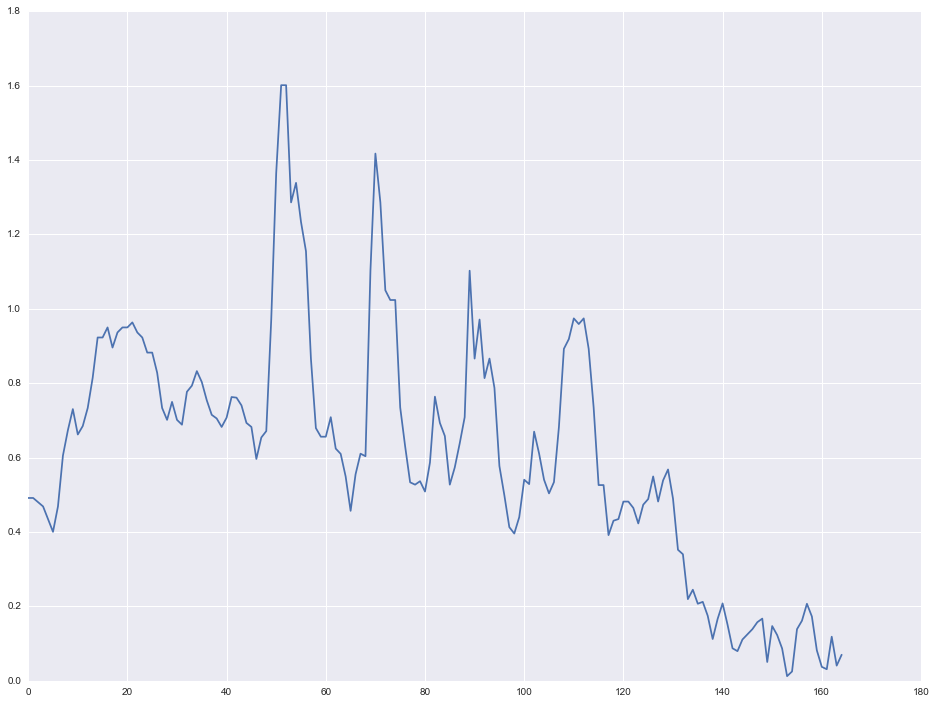

In [61]:
output.index.shape
plt.plot(plotData.normalize().max());

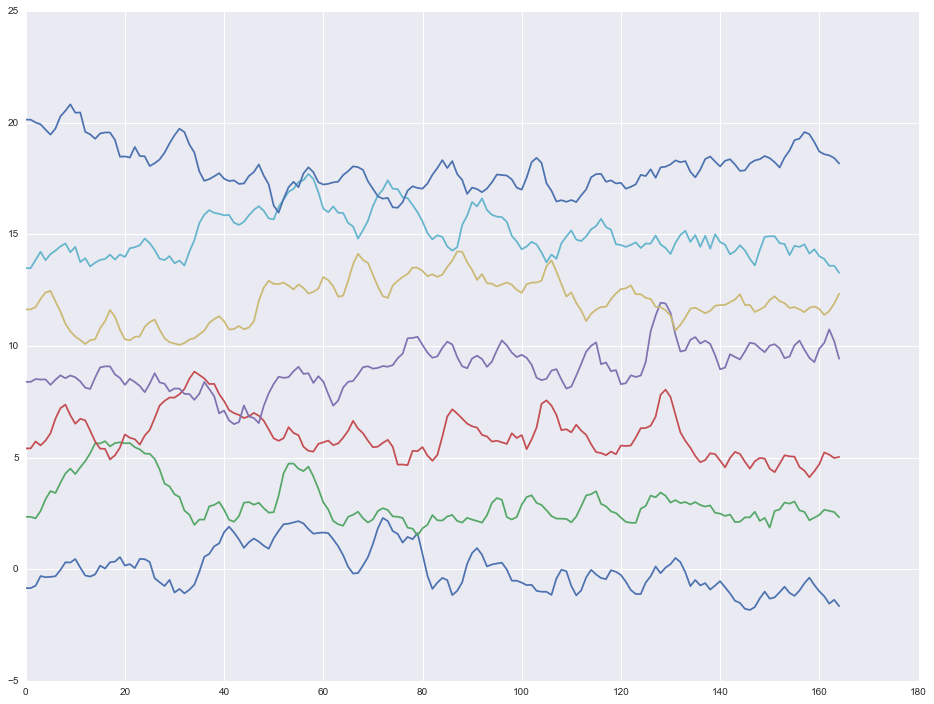

In [64]:
import numpy as np
from scipy import stats
sns.set_style('darkgrid')
lines = 7

examples = output.toTimeSeries().center(axis=1).subset(nsamples=lines, thresh=15)
mean = examples.mean(axis=1)

examples2 = examples - mean[:, np.newaxis]

examples4 = stats.zscore(examples2, axis=1)
examples5 = (examples4.T + np.arange(0,lines)*3).T
plt.plot(examples5.T); #  [0:20,:]);

In [90]:
image
